In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'diamond-price-prediciton-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F77458%2F8457230%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240516%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240516T131437Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dad4f086fef0f93ee46952fabc5d2b72da02bb735627d1d2928682c312b41c00cdc56ebefb589e73327028ad87624f01e1ec30cd96199307963c9892b1425ac630fb214f9b8f6664a0a0fa60a9aff12fb62fe268c85ec035b2f05c530edeb3b360a2c1b5358346541a1d1cc6fedf727908df97976b949873a2a7e8e3c7b40518c04ece8642a2c66e0e997b8e08949ad963c62f89a3e37ea253b2558893c37ae622f05111c62979d011f2fa2adb2f52c3a5e8bacde5f81ea1d5e4c0e1d79377313734532cf947dc8db771ac962884556d514ac58847e7a44d4252d235e806fd4e1f8646540c1cb543a2eb278d29c55f5a47da687f22c4e093537749ee1d02a40a8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 885571 bytes downloaded
Downloaded and uncompressed: diamond-price-prediciton-2024
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamond-price-prediciton-2024/train.csv
/kaggle/input/diamond-price-prediciton-2024/test.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
diamond_train = pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/train.csv')
diamond_test = pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/test.csv')

In [5]:
diamond = diamond_train.copy()

In [6]:
diamond.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [7]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [8]:
diamond.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
diamond['clarity'].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [10]:
clarity_lvl = {'I1':'1',
               'SI2':'2',
               'SI1':'3',
               'VS2':'4',
               'VS1':'5',
               'VVS2':'6',
               'VVS1':'7',
               'IF':'8'}
diamond = diamond.replace({'clarity': clarity_lvl})

In [11]:
(diamond[['x', 'y', 'z']]==0).sum()

x     5
y     4
z    17
dtype: int64

In [12]:
diamond['clarity'].value_counts()

clarity
3    10428
4     9824
2     7432
5     6475
6     4041
7     2904
8     1442
1      606
Name: count, dtype: int64

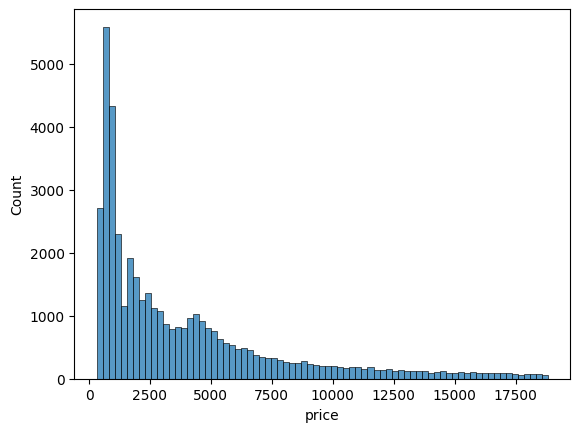

In [13]:
sns.histplot(diamond, x='price')
plt.show()

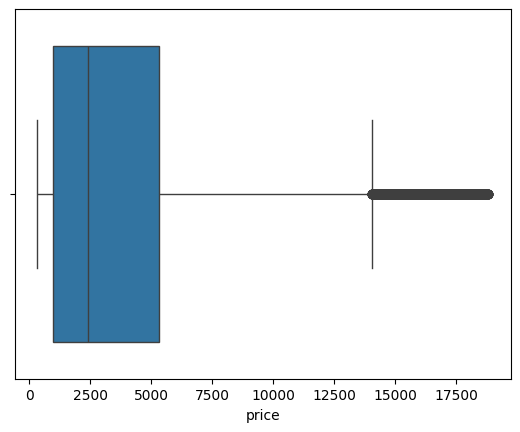

In [14]:
sns.boxplot(data=diamond, x='price', whis=2)
plt.show()

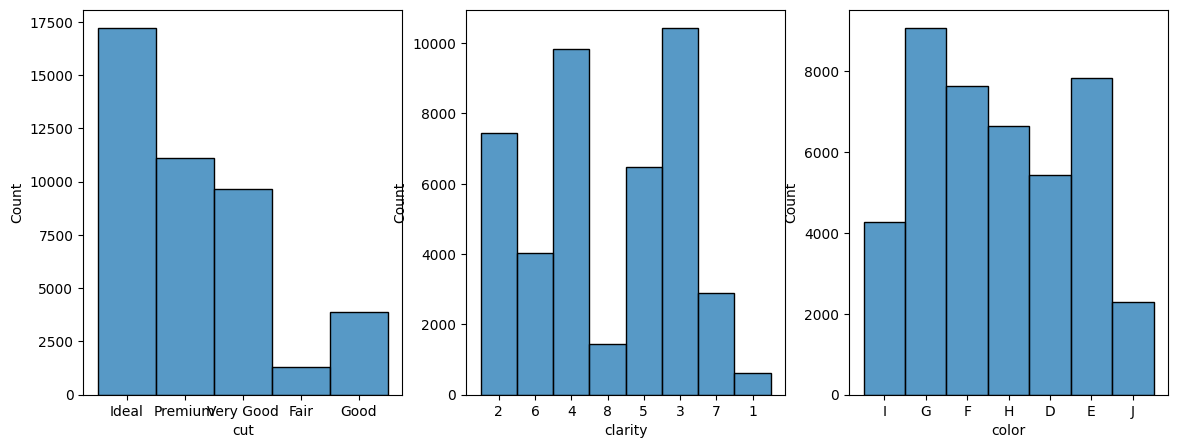

In [15]:
cat_feature = ['cut', 'clarity', 'color']
fig, ax = plt.subplots(1,3, figsize=(14,5))
for i in range(len(cat_feature)):
  sns.histplot(diamond, x=diamond[cat_feature[i]],
               ax = ax[i])
plt.show()

**Explore the relation between clarity and color of diamond**

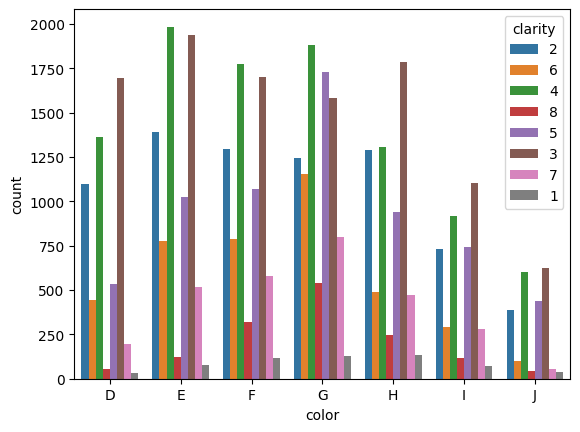

In [16]:
color_lvl = ['D','E','F','G','H','I','J']
sns.countplot(data = diamond,
            x='color',
            hue='clarity',
            order = color_lvl)
plt.show()

D(best color) has the most clarity of level 3 which is not the best one. also, J(worst color) has the most of level 3.

That explain that the color does not relate to clarity of diamond.

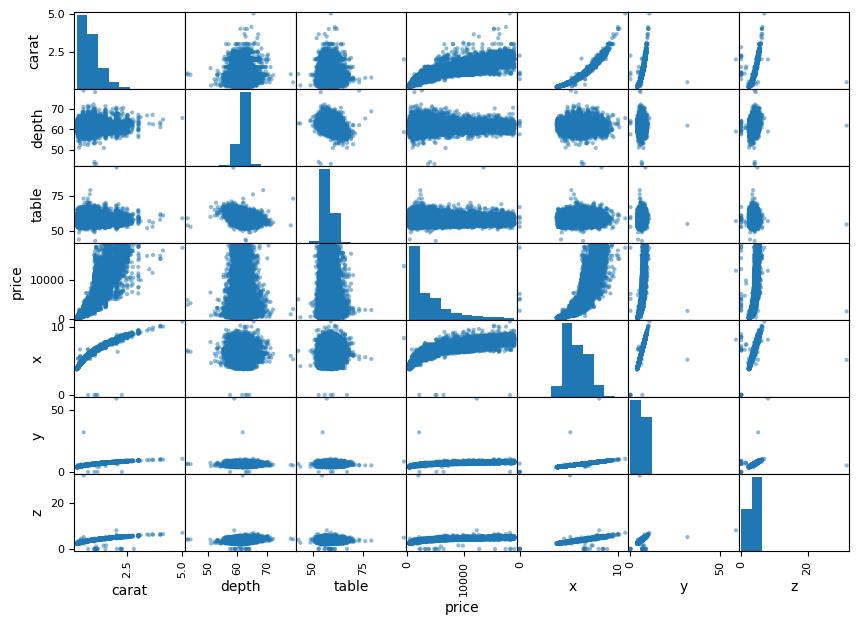

In [17]:
features = diamond.drop('Id',axis=1)
pd.plotting.scatter_matrix(features, alpha=0.5,
                           figsize=(10,7))
plt.show()

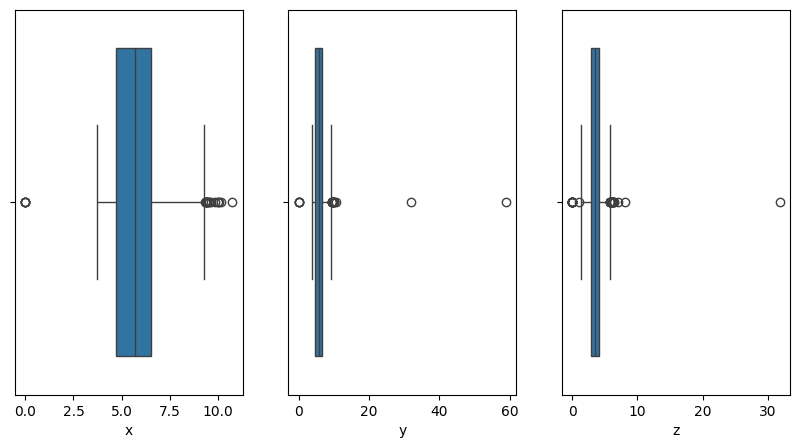

In [18]:
dim = ['x', 'y', 'z']
fig, ax = plt.subplots(1,3, figsize=(10,5))
for i, dim in enumerate(dim) :
  sns.boxplot(data=diamond, x=dim, ax=ax[i])
plt.show()

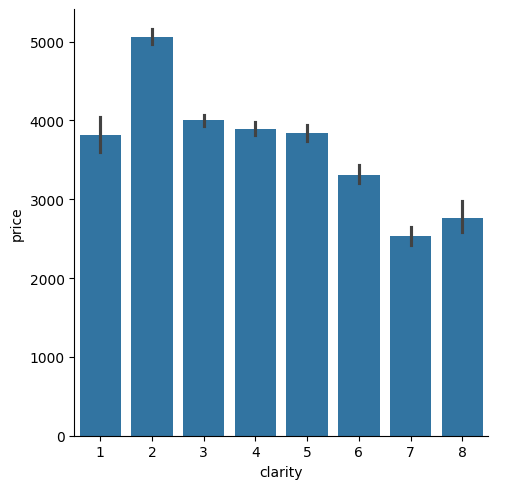

In [19]:
sns.catplot(diamond, x='clarity', y='price',
            kind='bar', order=['1','2','3','4','5','6','7','8'])
plt.show()

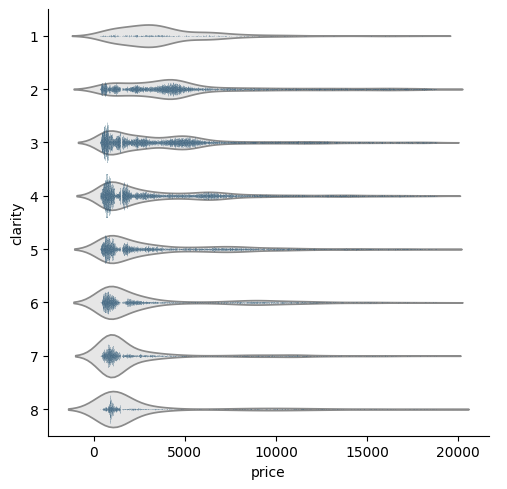

In [20]:
sns.catplot(diamond, x='price', y='clarity',
            kind="violin",
            order=['1','2','3','4','5','6','7','8'],
            color=".9", inner=None)
sns.swarmplot(data=diamond, x="price", y="clarity", size=.2)
plt.show()

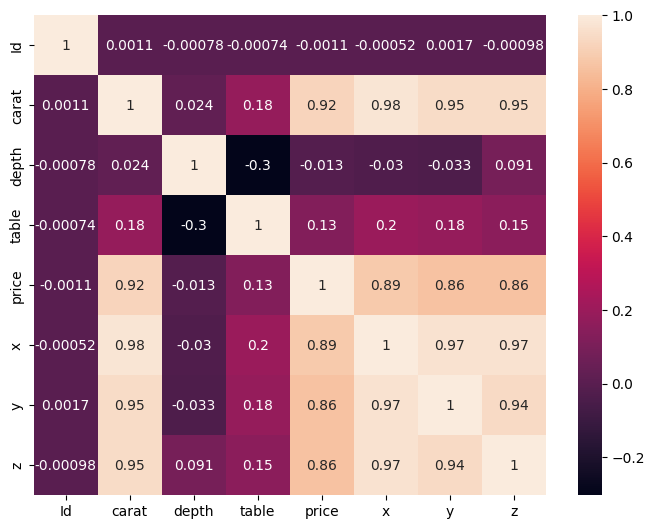

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
corr = diamond.corr(numeric_only=True)
sns.heatmap(corr, annot=True,
            ax = ax)
plt.show()

In [22]:
diamond['volume'] = diamond['x']*diamond['y']*diamond['z']

In [23]:
xy_mean = diamond[['x','y']].mean(axis=1)
base = 0.5*(diamond['table']/100)*xy_mean
height = diamond['z']
diamond['hypo'] = np.sqrt(base**2 + height**2)

In [24]:
diamond.corr(numeric_only=True)['price'].sort_values(ascending=False)

price     1.000000
carat     0.921911
volume    0.897903
x         0.885181
hypo      0.865190
y         0.861354
z         0.857665
table     0.128501
Id       -0.001111
depth    -0.013137
Name: price, dtype: float64

# **Data Cleaning and Processing**

In [64]:
diamond_train = diamond_train[(diamond_train['x'] >= 2) & (diamond_train['x'] <= 11)]
diamond_train = diamond_train[(diamond_train['y'] >= 2) & (diamond_train['y'] <= 11)]
diamond_train = diamond_train[(diamond_train['z'] >= 2) & (diamond_train['z'] <= 11)]

In [65]:
diamond_num = diamond_train.drop(['Id', 'cut', 'color', 'clarity', 'price'], axis=1)
diamond_cat = diamond_train.loc[: ,['cut', 'color', 'clarity']]
diamond_label = diamond_train.loc[:,['price']]

In [66]:
X = diamond_train.drop(['price'], axis=1)

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [68]:
atrr = ['x','y','z','table']
columns = list(diamond_train)
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, atrr):
    self.atrr = atrr
    return None
  def fit(self, X, y=None):
    self.atrr_ix = [X.columns.get_loc(i) for i in self.atrr]
    self.carat = X['carat']
    self.X = X.values
    return self
  def transform(self, X, y=None):
    x_ix, y_ix, z_ix, table_ix  = self.atrr_ix

    xy_mean = np.mean(self.X[:, [x_ix,y_ix]], axis=1)
    base = 0.5 * ((self.X[:, table_ix] / 100) * xy_mean)
    height = self.X[:, z_ix]

    diamond_volume = self.X[:, x_ix] * self.X[:, y_ix] * self.X[:, z_ix]
    diamond_hypo = np.sqrt((base**2 + height**2).astype(float))

    return np.c_[self.carat.values, diamond_volume, diamond_hypo]

In [69]:
cat_codes = {'Fair': 0, 'Good': 1,
             'Very Good': 2,
             'Premium': 3, 'Ideal': 4,
             'D': 6, 'E': 5, 'F': 4,
             'G': 3, 'H': 2, 'I': 1,
             'J': 0,
             'I1': 0, 'SI2': 1, 'SI1': 2,
             'VS2': 3, 'VS1': 4, 'VVS2': 5,
             'VVS1': 6, 'IF': 7
             }
class CustomEncoder(BaseEstimator, TransformerMixin):
  def __init__(self, custom_values=None):
    self.custom_values = custom_values
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    return np.vectorize(self.custom_values.get)(X)

In [70]:
num_pipeline = Pipeline([
    ('atrr_adder', CombinedAttributesAdder(atrr)),
    ("Std_Scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ('cat_encode', CustomEncoder(cat_codes)),
])

In [71]:
num_attribs = list(diamond_num)
cat_attribs = ['cut','clarity','color']
preprocess = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

In [72]:
diamond_prepared = preprocess.fit_transform(X)

# **Training a Model**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [74]:
diamond_features = diamond_prepared

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(diamond_features, diamond_label)
lin_predictions = lin_reg.predict(diamond_features)
lin_mse = mean_squared_error(diamond_label, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1196.4733415456553

In [76]:
r2_score(diamond_label, lin_predictions)

0.9097696341849308

In [77]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(diamond_features, diamond_label)
tree_predictions = tree_reg.predict(diamond_features)
tree_mse = mean_squared_error(diamond_label, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

33.96323627432966

In [78]:
r2_score(diamond_label, tree_predictions)

0.9999272949131246

In [79]:
scores = cross_val_score(tree_reg, diamond_features, diamond_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [80]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [731.61223146 716.19767616 741.29391866 737.52594261 756.57024228
 715.22781148 715.04521532 729.25290249 724.75561185 729.91111302]
Mean: 729.7392665315197
Standard deviation: 12.460042539694989


In [81]:
forest_reg = RandomForestRegressor()
forest_reg.fit(diamond_features, np.ravel(diamond_label))
forest_predictions = forest_reg.predict(diamond_features)
forest_mse = mean_squared_error(diamond_label, forest_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

33.96323627432966

In [82]:
scores = cross_val_score(forest_reg, diamond_features, np.ravel(diamond_label),
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())
display_scores(forest_rmse_scores)

Scores: [575.22507397 528.13461745 572.57370349 556.64531364 561.46343212
 547.62467413 557.25729962 539.53628206 528.9232766  569.67724963]
Mean: 553.7060922716562
Standard deviation: 16.313837857137347


## **Here is Random Forest is the best model.**

In [83]:
diamond_test

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,Ideal,G,VS2,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,Ideal,E,VVS1,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,Premium,E,SI2,61.0,60.0,6.68,6.66,4.07


In [84]:
ID = diamond_test['Id']

In [85]:
diamond_test_prepared = preprocess.fit_transform(diamond_test)

In [86]:
diamond_predictions = forest_reg.predict(diamond_test_prepared)

In [89]:
data={'ID':ID,'price':diamond_predictions}
sub=pd.DataFrame(data)
sub.to_csv('sub.csv',index=False)